In [1]:
#importing libraries
import pandas as pd
import sqlite3
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
#connecting to data base
conn = sqlite3.connect('zippedData/im.db/im.db')

In [3]:
#loading tables from the database
im = pd.read_sql("""SELECT * FROM sqlite_master""", conn)
im

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
#loading movie_basics table
movie_basics = pd.read_sql_query("SELECT * FROM movie_basics", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [5]:
#loading movie_ratings table
movie_ratings = pd.read_sql_query("SELECT * FROM movie_ratings", conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
# Merge movie_basics and movie_ratings on 'movie_id'
# both tables are from the same database and share primary and foreign keys and explain one information
rating_movie_df=pd.merge(movie_basics, movie_ratings, on='movie_id', how='left');
rating_movie_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0


In [7]:
#rating_movie_df
#checking for null values
rating_movie_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
averagerating      72288
numvotes           72288
dtype: int64

In [8]:
#Checking the summary statistics of our data 
rating_movie_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,146144.000000,114405.000000,73856.000000,7.385600e+04
mean,2014.621798,86.187247,6.332729,3.523662e+03
std,2.733583,166.360590,1.474978,3.029402e+04
min,2010.000000,1.000000,1.000000,5.000000e+00
25%,2012.000000,70.000000,5.500000,1.400000e+01
50%,2015.000000,87.000000,6.500000,4.900000e+01
75%,2017.000000,99.000000,7.400000,2.820000e+02
max,2115.000000,51420.000000,10.000000,1.841066e+06


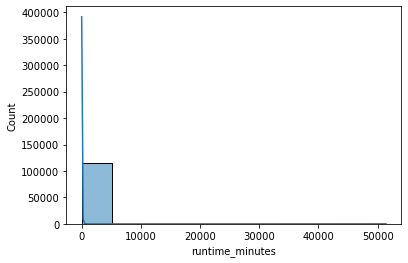

In [9]:
sns.histplot(data=rating_movie_df,x='runtime_minutes',kde=True,bins=10)
plt.show()

In [10]:
"""The runtime is right skewed hence we replace null values with median
"""

'The runtime is right skewed hence we replace null values with median\n'

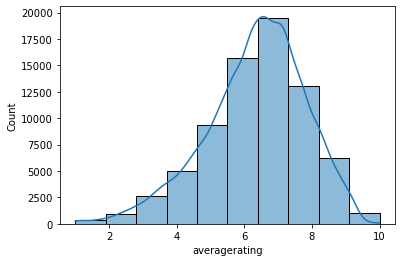

In [11]:
sns.histplot(data=rating_movie_df,x='averagerating',kde=True,bins=10)
plt.show()

In [12]:
"""The average rating column is normally distributed hence replace null values with mean
"""

'The average rating column is normally distributed hence replace null values with mean\n'

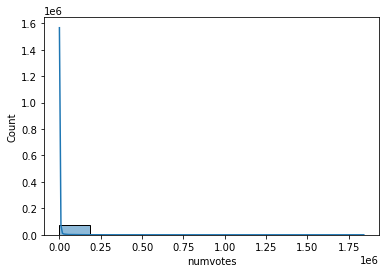

In [13]:
sns.histplot(data=rating_movie_df,x='numvotes',kde=True,bins=10)
plt.show()

In [14]:
"""The numvotes column is right skewed hence replace null values with the median
"""

'The numvotes column is right skewed hence replace null values with the median\n'

In [15]:
#Filling in the missing values in the rating_movie_df
#Original column
#Since this column is a title, you can use primary_title values as a fill for the missing entries, as it’s reasonable to assume that if an original title is missing, the primary title may be similar.
rating_movie_df['original_title'].fillna(rating_movie_df['primary_title'], inplace=True)

#runtime column
# Fill missing runtime_minutes with the overall median runtime
rating_movie_df['runtime_minutes'].fillna(rating_movie_df['runtime_minutes'].median(), inplace=True)

#Genre column
#Use a placeholder like "Unknown", as filling this with an actual genre could mislead the data analysis.
rating_movie_df['genres'].fillna("Unknown", inplace=True)

# Fill missing values in averagerating and numvotes with their respective overall means and median
rating_movie_df['averagerating'].fillna(rating_movie_df['averagerating'].mean(), inplace=True)
rating_movie_df['numvotes'].fillna(rating_movie_df['numvotes'].median(), inplace=True)

In [16]:
#Confirming if the columns have know no missing values
rating_movie_df.isnull().sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [17]:
#Checking for duplicates
rating_movie_df.duplicated().sum()

0

In [18]:
#Checking how our data looks like
rating_movie_df.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.000000,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.200000,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.900000,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,87.0,"Comedy,Drama",6.100000,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.500000,119.0
5,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy,6.332729,49.0
6,tt0112502,Bigfoot,Bigfoot,2017,87.0,"Horror,Thriller",4.100000,32.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.100000,263.0
8,tt0139613,O Silêncio,O Silêncio,2012,87.0,"Documentary,History",6.332729,49.0
9,tt0144449,Nema aviona za Zagreb,Nema aviona za Zagreb,2012,82.0,Biography,6.332729,49.0


In [19]:
#confirming data types for the different columns
rating_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146144 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  146144 non-null  float64
 5   genres           146144 non-null  object 
 6   averagerating    146144 non-null  float64
 7   numvotes         146144 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 10.0+ MB


In [20]:
#loading budget data
budget = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budget.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [21]:
# Checking the null values in the tn.movie_budgets file 
budget.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [22]:
#Checking for duplicate values
budget.duplicated().sum()

0

In [23]:
#Converting into a date time format 
budget['release_date']=pd.to_datetime(budget['release_date'])

In [24]:
# creating a column for year
budget['year']=budget['release_date'].dt.year

In [25]:
#creating a column for month 
budget['month']=budget['release_date'].dt.month

In [26]:
#Checking how our data looks like
budget.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009,12
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011,5
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019,6
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015,5
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017,12
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220",2015,12
6,7,2018-04-27,Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200",2018,4
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425",2007,5
8,9,2017-11-17,Justice League,"$300,000,000","$229,024,295","$655,945,209",2017,11
9,10,2015-11-06,Spectre,"$300,000,000","$200,074,175","$879,620,923",2015,11


In [27]:
#checking the data types for the different columns
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   year               5782 non-null   int64         
 7   month              5782 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 361.5+ KB


****DATA ANALYSIS****

***OBJECTIVES***
1. What types of films are doing best in box office?
2. What types of films should the company prioritize producing?
3. Who are some of the most popular directors/writers that the company might consider collaborating with or hiring?
4. What are the preferred film runtimes for audiences?
5. Who are some of the most popular actors the company should consider casting to attract a dedicated audience base?
6. What is the average production budget the company should expect?
7. What is the average retu
7. What is the average returns of films?
8. What has been the trend of genre production over the years?
9.Trends in Movie performance based on release date
10. linear regression, .Relationship between movie budget and worldwide gross
11. .Relationship between movies runtime and average ratings of movies

1. genre vs rating
- will answer question 1,2 and 3
2. 4 and 12
- linear regression/scatter plot
3. for question6, plot histogram for count of means
4. for question 8, plot histogram for the count of means for the worldwide gross
5. plot line graph for genre performance over the years genre and year
6. plot month verses the worldwide gross
7. linear regression, .Relationship between movie budget and worldwide gross

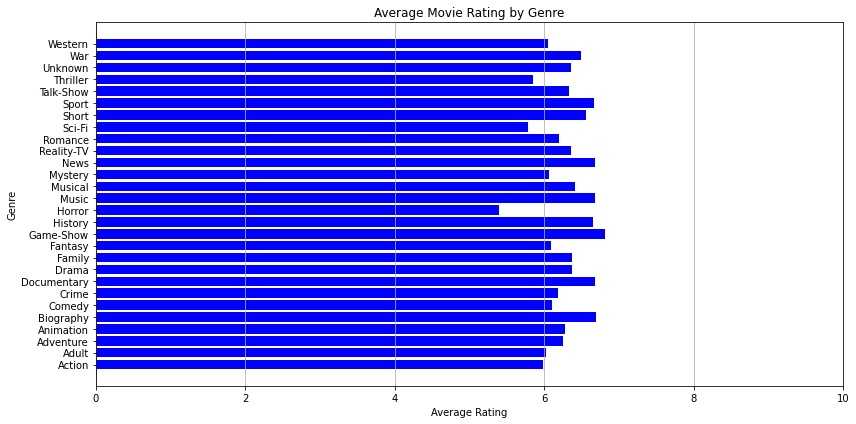

In [28]:
#Plotting Genre vs rating

# Create DataFrame
df = pd.DataFrame(rating_movie_df)

# Split genres and explode the DataFrame to have one genre per row
df['genres'] = df['genres'].str.split(',')
df_exploded = df.explode('genres')

# Group by genre and calculate average rating for each genre
average_rating_by_genre = df_exploded.groupby('genres')['averagerating'].mean().reset_index()

# Plotting the average ratings by genre
plt.figure(figsize=(12, 6))
plt.barh(average_rating_by_genre['genres'], average_rating_by_genre['averagerating'], color='blue')
plt.title('Average Movie Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.xlim(0, 10)  # Set x-axis limit to 10 for better visibility
plt.grid(axis='x')

# Show the plot
plt.tight_layout()
plt.show()

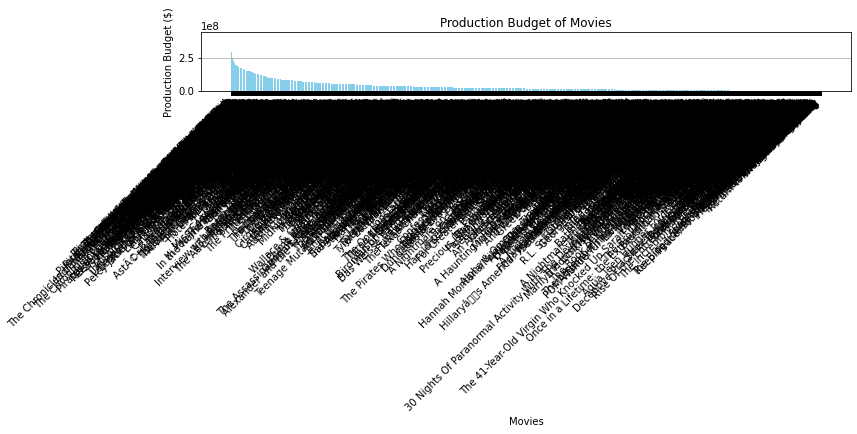

In [29]:
# Create a pandas DataFrame from the budget table
df = pd.DataFrame(budget)

# Ensure all values are strings (in case of mixed types)
df['production_budget'] = df['production_budget'].astype(str)

# Convert production_budget to numeric
df['production_budget'] = df['production_budget'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Limit to the first 100 columns (if applicable)
df = df.iloc[:, :10] 

# Plotting the production budget
plt.figure(figsize=(12, 6))
plt.bar(df['movie'], df['production_budget'], color='skyblue')
plt.title('Production Budget of Movies')
plt.xlabel('Movies')
plt.ylabel('Production Budget ($)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()